## DExB2 Example Class Test - Rice RNASeq

Worked answers

In [1]:
# Analysis modules - make sure you run this first to import all the modules you'll need
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

warnings.filterwarnings("ignore")

This project has been looking for genetic material to enhance rice yields under drought. RNASeq data has been generated from several tissues for cultivated rice and drought-tolerant wild varieties.  Read in the raw data on expression levels, find the 10 genes with proportionally the greatest increase in the roots of the wild varieties, find out what kind of genes they are and produce a heat map showing the change.

The raw expression data is spread across 6 files:  
        
        Cult_1.txt
        Cult_2.txt
        Cult_3.txt
        Wild_1.txt
        Wild_2.txt
        Wild_3.txt
        
The key columns are the gene name and the Transcripts per Million reads (TPM)
The other columns and the raw number of reads mapping to each gene (NumReads), the Length of the gene, and the Effective Length (takes into account all factors being modeled that will effect the probability of sampling fragments from this transcript, including the fragment length distribution and sequence-specific and gc-fragment bias)

The annotation is here:

        Rice_annot.txt
        
        

#### Read the RNASeq data in and join together to make a tidy table
You want the TPM (transcripts per million) column from each dataframe.

To set the index as the gene name use:

    index_col=0
    

In [2]:
! head -3 'Cult_1.txt'

Name	Length	EffectiveLength	TPM	NumReads
Scaffolds_0_0.0_mRNA_1	1170	976.101	0.000000	0.000
Scaffolds_0_0.1_mRNA_1	348	155.788	0.000000	0.000


In [3]:
cult1 = pd.read_table("Cult_1.txt", index_col=0)
cult2 = pd.read_table("Cult_2.txt", index_col=0)
cult3 = pd.read_table("Cult_3.txt", index_col=0)

wild1 = pd.read_table("Wild_1.txt", index_col=0)
wild2 = pd.read_table("Wild_2.txt", index_col=0)
wild3 = pd.read_table("Wild_3.txt", index_col=0)

In [4]:
wild3.shape

(45072, 4)

<div class = "alert alert-danger">
Q1 How many data rows are there in the third replicate of the wild rice?  (1 mark)
 
    
    a 8723    
    b 11296  
    c 13409   
    d 22467   
    Xe 45072    
    
Enter your answer on LEARN

In [5]:
cult1.tail(3)

,Length,EffectiveLength,TPM,NumReads
Name,,,,
Scaffolds_99_0.36_mRNA_1,3011,2817.101,32.367055,348.876
Scaffolds_9_0.0_mRNA_1,1428,1234.101,2.117795,10.000
Scaffolds_9_0.1_mRNA_1,1881,1687.101,5.731858,37.000


In [6]:
cult1.describe()

,Length,EffectiveLength,TPM,NumReads
count,45072.000000,45072.000000,45072.000000,45072.000000
mean,1305.090611,1111.693438,21.627699,77.706487
std,919.795650,919.220676,129.281538,355.129921
min,75.000000,1.414000,0.000000,0.000000
25%,684.000000,490.137000,0.000000,0.000000
50%,1088.000000,894.101000,0.139683,1.000000
75%,1650.000000,1456.101000,11.422414,53.000000
max,15999.000000,15805.101000,7730.831362,21684.946000


<div class = "alert alert-danger">
Q2 What is the maximum TPM for any gene in rep 1 of the Cultivated Rice?  (1 mark)

    a 3427.257  
    Xb 7730.83 
    c 21684.946  
    d 25196.333  
    e 41984.324  
    
Enter your answer on LEARN

In [7]:
cult1.sort_values(by='TPM', ascending=False).head(2)

,Length,EffectiveLength,TPM,NumReads
Name,,,,
Scaffolds_1400_0.36_mRNA_1,927,733.106,7730.831362,21684.946
Scaffolds_1468_0.0_mRNA_1,866,672.111,7499.550410,19285.966


<div class = "alert alert-danger">
Q3 What is name of the gene with the highest TPM in  Cultivated Rice rep 1? (1 mark)

    a Scaffolds_1827_0.16_mRNA_1 
    b Scaffolds_1075_2.1_mRNA_1
    Xc Scaffolds_1400_0.36_mRNA_1  
    d Scaffolds_1745_0.15_mRNA_1  
    e Scaffolds_1853_0.18_mRNA_1  
    
Enter your answer on LEARN

<div class = "alert alert-danger">
Q4 Plot TPM by NumReads for Cultivated Rice rep 1 as lmplot and upload the plot to LEARN (2 marks)

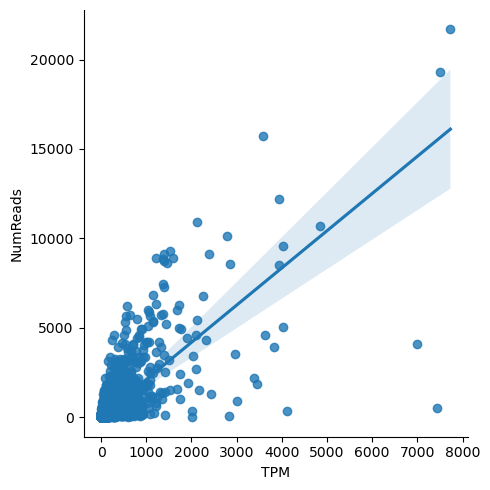

In [8]:
sns.lmplot(data=cult1, x="TPM", y="NumReads")

<div class = "alert alert-danger">
Q5 Fit a model for the line in this plot using ols().  Which of these statements is true?  (1 mark)

    a NumReads drives TPM
    b The intercept is significantly different from zero
    Xc The slope has a coefficient of 0.27
    d The P-value for NumReads supports a non-zero intercept
    e The t statistic for the slope shows a positive realtionship
    
Enter your answer on LEARN  

In [9]:
formula = 'TPM ~ NumReads'
fit = ols(formula, cult1).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2120,0.407,0.520,0.603,-0.586,1.010
NumReads,0.2756,0.001,245.992,0.000,0.273,0.278


Concatenate the TPM values across dataframes. Remember that you want only the TPM (transcripts per million) column from each dataframe, along with the gene name index . (If you try to include more than these columns from each dataframe, you will run into frustrating problems with column headers.)

Use  

    pd.concat  with keys=['cult_1', 'cult_2', 'cult_3', 'wild_1', 'wild_2', 'wild_3']
    
This gives nested column headers.  Reset to the top level using:  

    df.columns = df.columns.get_level_values(0)
    
Sort by the values for replicate 1 of the cultivate rice.  Use:

    df.sort_values()

In [10]:
dfList_TPMs = [cult1['TPM'], cult2['TPM'], cult3['TPM'], wild1['TPM'], wild2['TPM'], wild3['TPM']]

In [11]:
df_all = pd.concat(dfList_TPMs, axis=1, keys=['cult_1', 'cult_2', 'cult_3', 'wild_1', 'wild_2', 'wild_3'])

df_all

,cult_1,cult_2,cult_3,wild_1,wild_2,wild_3
Name,,,,,,
Scaffolds_0_0.0_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_0.1_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_0.6_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_1.6_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_1.7_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
Scaffolds_999_0.4_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_999_0.5_mRNA_1,3.372170,6.648666,5.284445,0.783064,2.257593,3.015181
Scaffolds_99_0.36_mRNA_1,32.367055,28.505414,29.646600,67.744370,70.416470,59.291123


In [12]:
df_all.columns = df_all.columns.get_level_values(0)
df_all

,cult_1,cult_2,cult_3,wild_1,wild_2,wild_3
Name,,,,,,
Scaffolds_0_0.0_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_0.1_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_0.6_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_1.6_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_0_1.7_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
Scaffolds_999_0.4_mRNA_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scaffolds_999_0.5_mRNA_1,3.372170,6.648666,5.284445,0.783064,2.257593,3.015181
Scaffolds_99_0.36_mRNA_1,32.367055,28.505414,29.646600,67.744370,70.416470,59.291123


In [13]:
df_all = df_all.sort_values(by=['cult_1'])

In [14]:
df_all.tail(3)

,cult_1,cult_2,cult_3,wild_1,wild_2,wild_3
Name,,,,,,
Scaffolds_1827_0.16_mRNA_1,7437.500491,3693.712550,5249.881257,2814.047534,4145.351815,3535.864025
Scaffolds_1468_0.0_mRNA_1,7499.550410,7254.810569,7358.608867,1844.731895,3120.920484,1810.398556
Scaffolds_1400_0.36_mRNA_1,7730.831362,3505.114337,5285.099800,5026.121868,4391.932604,4283.996082


<div class = "alert alert-danger">
Q6 What is the TPM in wild rice replicate 1 for the gene most highly expressed in cuiltvated rice replicate 1?  (1 mark)

    a 785.21 
    b 9071.88  
    c 28106.24  
    Xd 5026.12  
    e 58203.12 
    
Enter your answer on LEARN


Read in the annotations.  Use df.loc to find the row where 'Gene_model' matches the name of the gene most highly expressed gene in cultivate rice replicate 1.


In [15]:
annot = pd.read_table("Rice_annot.txt")

In [16]:
annot.head(3)

,Annotation,Gene_model
0,not assigned.not annotated,Scaffolds_0_0.0_mRNA_1
1,not assigned.not annotated,Scaffolds_0_0.1_mRNA_1
2,not assigned.not annotated,Scaffolds_0_0.6_mRNA_1


In [17]:
annot.loc[annot["Gene_model"] == "Scaffolds_1400_0.36_mRNA_11"]

,Annotation,Gene_model
19,"Tonoplast intrinsic protein, water channel",Scaffolds_1400_0.36_mRNA_11


<div class = "alert alert-danger">
Q7 What is the annotation for the most highly expressed gene in cultivate rice replicate 1? (1 mark)

    a External stimuli response.salinity 
    b Solute transport.primary  
    c Cell wall organisation 
    d Protein homeostasis 
    Xe Tonoplast intrinsic protein  
    
Enter your answer on LEARN


Plot a heatmap of the TPM data susing sns.heatmap()  


To remove the influence of highly expressed outliers use 

    robust=True
    

<Axes: ylabel='Name'>

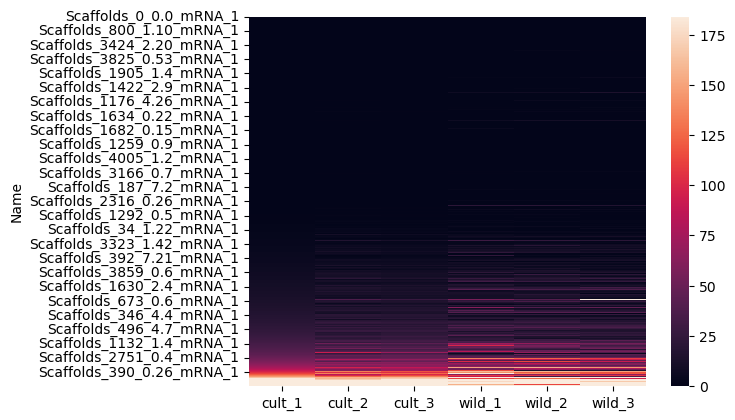

In [18]:
sns.heatmap(data = df_all, robust=True) 

<div class = "alert alert-danger">
Q8 upload the heatmap to LEARN (2 marks)

Re-arrange the dataframe to long form using

    pd.melt
    
The value name should be 'TPM'.

The value vars will be ['cult_1', 'cult_2', 'cult_3', 'wild_1', 'wild_2', 'wild_3']
    
You will need to reset the index first using:
    
    df.reset_index(inplace = True)

In [19]:
df_all.reset_index(inplace = True)

In [20]:
df_all.head(3)

,Name,cult_1,cult_2,cult_3,wild_1,wild_2,wild_3
0,Scaffolds_0_0.0_mRNA_1,0.0,0.0,0.0,0.0,0.0,0.0
1,Scaffolds_619_0.12_mRNA_1,0.0,0.0,0.0,0.0,0.0,0.0
2,Scaffolds_619_0.10_mRNA_1,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df = pd.melt(df_all, id_vars='Name', value_name='TPM', value_vars=['cult_1', 'cult_2', 'cult_3', 'wild_1', 'wild_2', 'wild_3'])

In [22]:
df.head(3)

,Name,variable,TPM
0,Scaffolds_0_0.0_mRNA_1,cult_1,0.0
1,Scaffolds_619_0.12_mRNA_1,cult_1,0.0
2,Scaffolds_619_0.10_mRNA_1,cult_1,0.0


In [23]:
df.sort_values(by='TPM', ascending=False).head(3)

,Name,variable,TPM
45071,Scaffolds_1400_0.36_mRNA_1,cult_1,7730.831362
45070,Scaffolds_1468_0.0_mRNA_1,cult_1,7499.550410
45069,Scaffolds_1827_0.16_mRNA_1,cult_1,7437.500491


<div class = "alert alert-danger">
Q9 Which of the samples has the maximum TPM overall? (1 mark)

    Xa Cultivated 1   
    b Cultivated 2 
    c Cultivated 3   
    d Wild 1    
    e Wild 2  
    f Wild 3. 
    
Enter your answer on LEARN

Split the variable column with sample type and replicate into two columns.  Use:  
    
    df[['A', 'B']] = df['AB'].str.split(' ', n=1, expand=True)
    
Drop the original 'variable' column

In [24]:
df[['Sample','Rep']] = df['variable'].str.split('_', n=1, expand=True)

In [25]:
df = df.drop('variable', axis=1)

In [26]:
df.head(3)

,Name,TPM,Sample,Rep
0,Scaffolds_0_0.0_mRNA_1,0.0,cult,1
1,Scaffolds_619_0.12_mRNA_1,0.0,cult,1
2,Scaffolds_619_0.10_mRNA_1,0.0,cult,1


Use multiple regression analysis with two categorical explanatory variables and a numerical response variable to look at the effect of Sample and Replicate on TPM.  

Use the formula 'TPM ~ Sample + Rep'


In [27]:
formula = 'TPM ~ Sample + Rep'
fit = ols(formula, df).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,21.6318,0.470,46.015,0.000,20.710,22.553
Sample[T.wild],0.1266,0.470,0.269,0.788,-0.795,1.048
Rep[T.2],-0.1397,0.576,-0.243,0.808,-1.268,0.989
Rep[T.3],-0.1510,0.576,-0.262,0.793,-1.279,0.977


<div class = "alert alert-danger">
Q10 What is the P value for the effect of Sample? (1 mark)

    Xa 0.788 
    b 0.023 
    c 0.001 
    d 0.432 
    e 0.037
    
Enter your answer on LEARN

These genes are involved in salt tolerance.  Are salt tolerance genes significantly differentially expressed between wild and cultivated rice?

    ['Scaffolds_120_4.20_mRNA_1',
     'Scaffolds_1226_3.13_mRNA_1',
     'Scaffolds_1308_3.10_mRNA_1',
     'Scaffolds_1516_1.16_mRNA_1',
     'Scaffolds_2846_0.55_mRNA_1',
     'Scaffolds_486_2.19_mRNA_1',
     'Scaffolds_585_0.35_mRNA_1']
 
Subset the dataframe using
 
      df[df['Column'].isin([list])]
      
 
 Then make a boxplot to compare expression of these genes between all the samples.
     

In [28]:
df.head(3)

,Name,TPM,Sample,Rep
0,Scaffolds_0_0.0_mRNA_1,0.0,cult,1
1,Scaffolds_619_0.12_mRNA_1,0.0,cult,1
2,Scaffolds_619_0.10_mRNA_1,0.0,cult,1


In [29]:
salt_list =  ['Scaffolds_120_4.20_mRNA_1',
 'Scaffolds_1226_3.13_mRNA_1',
 'Scaffolds_1308_3.10_mRNA_1',
 'Scaffolds_1516_1.16_mRNA_1',
 'Scaffolds_2846_0.55_mRNA_1',
 'Scaffolds_486_2.19_mRNA_1',
 'Scaffolds_585_0.35_mRNA_1']

In [30]:
salt_df = df[df['Name'].isin(salt_list)]

In [31]:
salt_df

,Name,TPM,Sample,Rep
24760,Scaffolds_2846_0.55_mRNA_1,1.119932,cult,1
36699,Scaffolds_585_0.35_mRNA_1,18.217277,cult,1
37321,Scaffolds_486_2.19_mRNA_1,20.146707,cult,1
37617,Scaffolds_1226_3.13_mRNA_1,21.199741,cult,1
41023,Scaffolds_1516_1.16_mRNA_1,42.420924,cult,1
41455,Scaffolds_120_4.20_mRNA_1,47.625959,cult,1
41892,Scaffolds_1308_3.10_mRNA_1,54.660554,cult,1
69832,Scaffolds_2846_0.55_mRNA_1,2.173879,cult,2
81771,Scaffolds_585_0.35_mRNA_1,20.104353,cult,2
82393,Scaffolds_486_2.19_mRNA_1,27.342192,cult,2


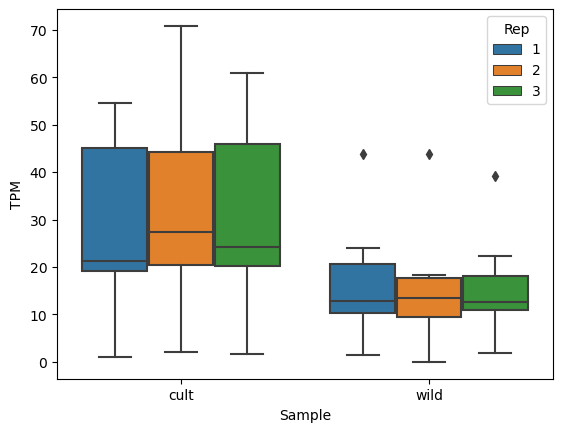

In [32]:
sns.boxplot(x='Sample', y='TPM', hue='Rep', data=salt_df);

<div class = "alert alert-danger">
Q11 upload the boxplot to LEARN (2 marks)

# End of worked answers for example test.

The following sections have some other examples of questions that we could have asked instead, with worked answers.

#### Make a new dataframe with average expression level by sample

use groupby  

use df.reset_index() afterwards to make it a dataframe not a series

In [33]:
df.head(3)

,Name,TPM,Sample,Rep
0,Scaffolds_0_0.0_mRNA_1,0.0,cult,1
1,Scaffolds_619_0.12_mRNA_1,0.0,cult,1
2,Scaffolds_619_0.10_mRNA_1,0.0,cult,1


In [34]:
df_av = df.groupby(["Name", "Sample"])["TPM"].mean()
df_av = df_av.reset_index()

In [35]:
df_av.sort_values(['TPM'], ascending = False).head(10)

,Name,Sample,TPM
18056,Scaffolds_1468_0.0_mRNA_1,cult,7370.989949
36352,Scaffolds_2031_1.22_mRNA_1,cult,7080.038260
84160,Scaffolds_859_0.15_mRNA_1,cult,5710.160871
65886,Scaffolds_3926_0.15_mRNA_1,cult,5538.424565
15288,Scaffolds_1400_0.36_mRNA_1,cult,5507.015166
31020,Scaffolds_1827_0.16_mRNA_1,cult,5460.364766
56225,Scaffolds_3251_0.30_mRNA_1,wild,5148.349559
4498,Scaffolds_111_2.19_mRNA_1,cult,4984.881858
39576,Scaffolds_2224_2.9_mRNA_1,cult,4939.801227
27616,Scaffolds_1725_0.7_mRNA_1,cult,4706.014045


<div class = "alert alert-danger">
Q12 Which gene has the highest average TPM in Cultivated Rice?

    a Scaffolds_133_0.04_mRNA_1 
    b Scaffolds_766_0.01_mRNA_1 
    c Scaffolds_1036_0.26_mRNA_1 
    Xd Scaffolds_1468_0.0_mRNA_1 
    e Scaffolds_57_0.12_mRNA_1 
    
Enter your answer on LEARN

Re-arrange to give columns for Cultivated and for wild.    
Use pivot  
Re-set the index again to keep Name as a column not the index  

In [36]:
df_avbystrain = df_av.pivot(index = 'Name', columns='Sample', values = 'TPM')
df_avbystrain = df_avbystrain.reset_index()
df_avbystrain.head(3)

Sample,Name,cult,wild
0,Scaffolds_0_0.0_mRNA_1,0.0,0.0
1,Scaffolds_0_0.10_mRNA_1,0.0,0.0
2,Scaffolds_0_0.11_mRNA_1,0.0,0.0


In [37]:
df_avbystrain.describe()

Sample,cult,wild
count,45072.000000,45072.000000
mean,21.534876,21.661486
std,130.292589,108.594228
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.271761,0.291263
75%,11.977015,13.056220
max,7370.989949,5148.349559


<div class = "alert alert-danger">
Q13 What is the Median average TPM in Wild Rice?

    0.291 (imagine multiple choice options here
    
Enter your answer on LEARN

Add a new column with the log 2 change between Cultivated and Wild.
Replace the NaN inthe new column with 0 using .fillna

In [38]:
df_avbystrain['log2Change'] = np.log2((df_avbystrain['cult']+0.001) - np.log2(df_avbystrain['wild']+0.001)) 

In [39]:
df_avbystrain.head(3)

Sample,Name,cult,wild,log2Change
0,Scaffolds_0_0.0_mRNA_1,0.0,0.0,3.317128
1,Scaffolds_0_0.10_mRNA_1,0.0,0.0,3.317128
2,Scaffolds_0_0.11_mRNA_1,0.0,0.0,3.317128


In [40]:
df_avbystrain.tail(3)

Sample,Name,cult,wild,log2Change
45069,Scaffolds_9_0.0_mRNA_1,2.690506,5.250675,-1.743094
45070,Scaffolds_9_0.1_mRNA_1,5.759084,5.430653,1.730615
45071,Scaffolds_9_0.8_mRNA_1,10.531444,24.526561,2.564649


Plot a histogram of the log2Change. Use

    sns.displot
    
Set the number of bins with

    bins=500
  
And limit the height of the y axis with

    plt.ylim(0, 1000)

(0.0, 1000.0)

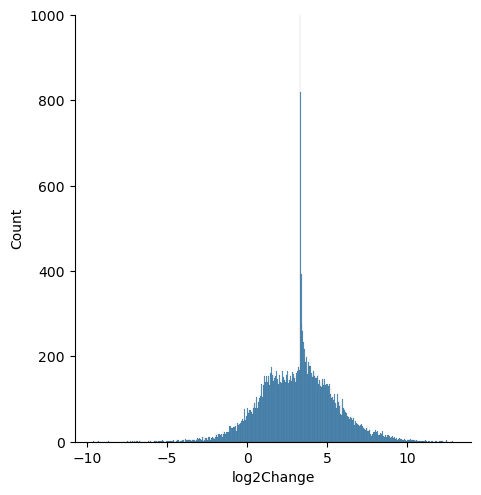

In [41]:
sns.displot(data=df_avbystrain, x='log2Change', bins=500)
plt.ylim(0, 1000)

<div class = "alert alert-danger">
Q14 Histogram of log2fold change in gene expression between cultivated and wild rice roots (3 marks)
    
    
    Upload your plot to LEARN

Subset the dataframe to just those which show large (over 2^5-fold, 32-fold) changes. Use

    df[(df["column"]>5 | (df["column"]<-5))]

In [42]:
change_df = df_avbystrain[(df_avbystrain['log2Change']>5) | (df_avbystrain['log2Change']<-5)]

In [43]:
df_avbystrain.shape

(45072, 4)

In [44]:
change_df.shape

(4750, 4)

<div class = "alert alert-danger">
Q14 Roughly what percentage of genes show more than 5x log2 change in expression levels between wild and cultivated rice

    a 0.01%  
    b 0.1%   
    c 1%   
    Xd 10%  
    e 90%   
    
Enter your answer on LEARN

#### Add the annotation  
You earlier tead in Rice_annot.txt.

Now join it to the expression level dataset. 

In [45]:
annot

,Annotation,Gene_model
0,not assigned.not annotated,Scaffolds_0_0.0_mRNA_1
1,not assigned.not annotated,Scaffolds_0_0.1_mRNA_1
2,not assigned.not annotated,Scaffolds_0_0.6_mRNA_1
3,not assigned.not annotated,Scaffolds_0_1.6_mRNA_1
4,not assigned.not annotated,Scaffolds_0_1.7_mRNA_1
...,...,...
50148,RNA processing.RNA surveillance.exosome comple...,maker_scaffolds_998_pilon_augustu_gene_0.7_mRNA_1
50149,Protein biosynthesis.mRNA quality control.NGD ...,maker_scaffolds_998_pilon_augustu_gene_0.7_mRNA_1
50150,not assigned.not annotated,maker_scaffolds_999_pilon_augustu_gene_0.4_mRNA_1
50151,not assigned.annotated,maker_scaffolds_999_pilon_augustu_gene_0.5_mRNA_1


In [46]:
Anot = pd.read_table("Rice_annot.txt")

In [47]:
annot_avbystrain = pd.merge(df_avbystrain, annot, how='left', left_on=['Name'], right_on=['Gene_model'])
annot_avbystrain.head(3)

,Name,cult,wild,log2Change,Annotation,Gene_model
0,Scaffolds_0_0.0_mRNA_1,0.0,0.0,3.317128,not assigned.not annotated,Scaffolds_0_0.0_mRNA_1
1,Scaffolds_0_0.10_mRNA_1,0.0,0.0,3.317128,NaN,NaN
2,Scaffolds_0_0.11_mRNA_1,0.0,0.0,3.317128,NaN,NaN


In [48]:
annot_avbystrain.shape

(45544, 6)

In [49]:
annot_avbystrain.isna().sum()

Name              0
cult              0
wild              0
log2Change     1840
Annotation    25996
Gene_model    25996
dtype: int64

<div class = "alert alert-danger">
Q15 What percentage of genes have no annotation (NaNs)

    a 0.1%  
    b 2.3%   
    c 10.4%   
    Xd 57.4%  
    e 63.2%   
    
Enter your answer on LEARN

Find the change in expression of Chalcone Synthases (CHS).  Use

    str.contains()  
    
to subset the dataframe to rows which have a match for 'CHS' in the 'Annotation column

In [50]:
annot_avbystrain[annot_avbystrain['Annotation'].str.contains('CHS', na = False)]

,Name,cult,wild,log2Change,Annotation,Gene_model
44662,Scaffolds_947_5.40_mRNA_1,187.98359,320.122445,7.489142,Secondary metabolism.phenolics.flavonoid biosy...,Scaffolds_947_5.40_mRNA_1


<div class = "alert alert-danger">
Q16 Roughly what log2change is seen in the CHS gene (Chalcone synthase, anthocyanin pathway?)
   Try using 
       str.contains('CHS', na=False)

    a -5.34  
    b -0.77  
    c 0.02 
    d 1.52 
    e 7.49  
    
Enter your answer on LEARN

Find the 10 genes with the greatest increase in cultivated compared to wild rice.  Use

    df.sort_values()
    
on the log2Change column

In [51]:
annot_avbystrain.sort_values(by=['log2Change','wild']).tail(10)

,Name,cult,wild,log2Change,Annotation,Gene_model
5488,Scaffolds_1287_0.12_mRNA_1,1.088544,161.845194,NaN,not assigned.annotated,Scaffolds_1287_0.12_mRNA_1
38762,Scaffolds_648_0.7_mRNA_1,2.049825,163.086264,NaN,Enzyme classification.EC_2 transferases.EC_2.8...,Scaffolds_648_0.7_mRNA_1
22541,Scaffolds_2465_3.8_mRNA_1,6.899383,192.658611,NaN,NaN,NaN
41737,Scaffolds_808_0.3_mRNA_1,0.187526,209.824752,NaN,NaN,NaN
11623,Scaffolds_1592_3.6_mRNA_1,0.000000,214.774755,NaN,NaN,NaN
25588,Scaffolds_287_1.18_mRNA_1,0.720234,263.954815,NaN,Enzyme classification.EC_1 oxidoreductases.EC_...,Scaffolds_287_1.18_mRNA_1
8906,Scaffolds_1456_0.26_mRNA_1,7.965426,273.645802,NaN,Enzyme classification.EC_1 oxidoreductases.EC_...,Scaffolds_1456_0.26_mRNA_1
15789,Scaffolds_1831_3.16_mRNA_1,0.543514,317.705400,NaN,NaN,NaN
28366,Scaffolds_3242_0.34_mRNA_1,0.000000,751.870726,NaN,NaN,NaN
31858,Scaffolds_3727_0.28_mRNA_1,0.174202,908.814983,NaN,not assigned.annotated,Scaffolds_3727_0.28_mRNA_1


<div class = "alert alert-danger">
Q17 Which is the likely function of the annotated gene with the highest level change?

    a Protein folding 
    b Oxidoreductase   
    Xc Phytohormone action  
    d RNA biosynthesis  
    e Cell Wall modification 
    
Enter your answer on LEARN

## Challenge section with no worked code

Do a PCA to understand overall patterns in the dataset, from log2 change

- which samples have similar behaviour? Do they cluster by strain (PC plot on samples)
- which genes have similar behaviour? (PC plot on genes)
- after reduce the dataset size by filtering out genes with missing values
